In [1]:
####################################################################
###    This is the PYTHON version of program 3.3 from page 79 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model with two different age-groups.			   #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*beta is the matrix of transmission rates and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*IC is the rate at which children mature and move into the adult age class

*nC is the proportion of the population that are in the childhood group. This is not defined explicitly but calculated as:  nC = μA/(lC+μA)

*mu[0] is the death rate in the childhood group

*mu[1] is the death rate in the adult group

*nu is the birth rate into the childhood class. This is not defined explicitly but calculated as:  ν = (lC+μA) nC

*SC(0)	is the initial proportion of the population that are both susceptible and in the childhood group.

*IC(0)	is the initial proportion of the population that are both infectious and in the childhood group.

*SA(0)	is the initial proportion of the population that are both susceptible and in the adult group.

*IA(0)	is the initial proportion of the population that are both infectious and in the adult group.

In [3]:
lC=0.066667
mu=[0.0, 0.0166667]
S0=[0.1, 0.1]
I0=[0.0001, 0.0001]
ND=MaxTime=100
beta=np.array([100.0, 10.0, 10.0, 20.0])
gamma=10.0
nC=mu[1]/(lC+mu[1])
nA=1.0-nC
n=np.array([nC,nA])
nu=(lC+mu[1])*n[0]
TS=0.01
INPUT=np.hstack((S0,I0))

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP    
	Y[0] = nu - (beta[0] * V[2] + beta[2] * V[3]) * V[0] - mu[0] * V[0] - lC * V[0]
	Y[1] = lC * V[0] - (beta[1]*V[2] + beta[3]*V[3]) * V[1] - mu[1] * V[1]
	Y[2] = (beta[0] * V[2] + beta[2] * V[3]) * V[0] - gamma * V[2] - mu[0] * V[2] - lC * V[2]
	Y[3] = (beta[1]*V[2] + beta[3]*V[3]) * V[1] - gamma * V[3] - mu[1] * V[3]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)

[[1.00000000e-01 1.00000000e-01 1.00000000e-04 1.00000000e-04]
 [1.00088954e-01 1.00047088e-01 1.00904363e-04 9.32576580e-05]
 [1.00177816e-01 1.00094347e-01 1.01753144e-04 8.70450071e-05]
 ...
 [9.75666166e-02 1.94489264e-01 1.00951352e-03 3.20448992e-04]
 [9.75666180e-02 1.94489795e-01 1.00951049e-03 3.20449414e-04]
 [9.75666196e-02 1.94490326e-01 1.00950747e-03 3.20449840e-04]]


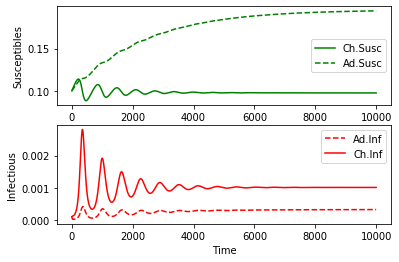

In [5]:
pl.subplot(211)
pl.plot(RES[:,0], 'g-', label='Ch.Susc')
pl.plot(RES[:,1], 'g--', label='Ad.Susc')
pl.ylabel("Susceptibles")
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(212)
pl.plot(RES[:,3], 'r--', label='Ad.Inf')
pl.plot(RES[:,2], 'r-', label='Ch.Inf')
pl.ylabel('Infectious')
pl.xlabel('Time')
pl.legend(loc=0)
pl.show()